In [6]:
import matplotlib.pyplot as plt


def print_graph(predicted, x_train, y_train_1, y_train_2):
    plt.clf()
    plt.plot(x_train, y_train_1, 'go', label='Dataset 1 Labels', alpha=0.5)
    plt.plot(x_train, y_train_2, 'go', color='red', label='Dataset 2 Labels', alpha=0.5)

    plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
    plt.legend(loc='best')
    plt.show()

In [7]:
import numpy as np
import pandas as pd

def get_linear_dataframes():

    x_values = [i for i in range(11)]
    x_train = np.array(x_values, dtype=np.float32)
    x_train = x_train.reshape(-1, 1)

    y_values_1 = [2*i + 1 for i in x_values]
    y_train_1 = np.array(y_values_1, dtype=np.float32)
    y_train_1 = y_train_1.reshape(-1, 1)

    y_values_2 = [0.5*i + 0.5 for i in x_values]
    y_train_2 = np.array(y_values_2, dtype=np.float32)
    y_train_2 = y_train_2.reshape(-1, 1)

    df_X = pd.DataFrame(x_train, columns = ['X'])
    df_Y1 = pd.DataFrame(y_train_1, columns = ['Y'])
    df_Y2 = pd.DataFrame(y_train_2, columns = ['Y'])

    df1 = pd.concat([df_X, df_Y1], axis=1)
    df2 = pd.concat([df_X, df_Y2], axis=1)

    return [df1, df2]

In [8]:
from helper_libs.shared.models.LinearRegression import LinearRegression

data_federation = get_linear_dataframes()

X_col = ['X']
Y_col = ['Y']
in_layer = len(X_col)
out_layer = len(Y_col)
optimizer = "SGD"
criterion = "MSELoss"
starting_model = LinearRegression(in_layer, out_layer)
federal_epochs = 1
epochs = 50
learn_rate = 0.01

In [9]:
from sail_safe_functions.aggregator.machine_learning.federated_averaging import federated_averaging

model = federated_averaging(epochs, federal_epochs, data_federation, X_col, Y_col, learn_rate, starting_model, criterion, optimizer)

### Model Before and After

/tmp/ipykernel_1755/190915468.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_train, y_train_2, 'go', color='red', label='Dataset 2 Labels', alpha=0.5)


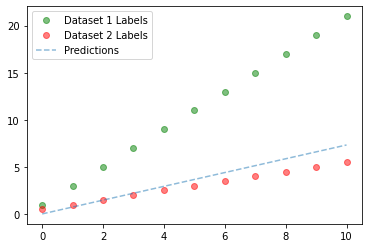

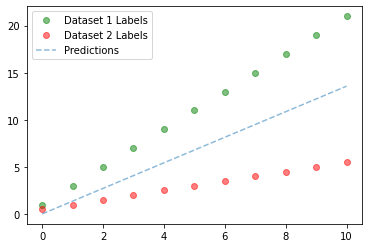

In [10]:
import torch

x = torch.Tensor(data_federation[0]['X']).float().reshape(-1, 1)
y1 = torch.Tensor(data_federation[0]['Y']).float().reshape(-1, 1)
y2 = torch.Tensor(data_federation[1]['Y']).float().reshape(-1, 1)

print_graph(starting_model(x).data.numpy(), x, y1, y2)
print_graph(model(x).data.numpy(), x, y1, y2)